In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import cehd

In [2]:
pre_assembled_file = 'Input/Processed/osha_data.csv'
raw_exposure_data = pd.read_csv(pre_assembled_file, index_col=0)

C:\Users\jmank\AppData\Local\Temp\ipykernel_31096\3561046757.py:2: DtypeWarning: Columns (1,6,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_exposure_data = pd.read_csv(pre_assembled_file, index_col=0)


In [3]:
path_settings = {
    'qualif_conv_file' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables/qualif_new_2020.csv',
    'unit_conv_file' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables/unit_conv_2020.csv',
    'it_directory' : 'Input/Raw/OSHA/CEHD/CEHD1984_2018/cleaning scripts/Conversion tables IT',
    'cehd_log_file' : 'cehd_log_file.json'
} 

py_exposure_data = cehd.clean_chemical_exposure_health_data(raw_exposure_data, path_settings)

py_exposure_data

,AIR_VOLUME_SAMPLED,BLANK_USED,CITY,DATE_REPORTED,DATE_SAMPLED,EIGHT_HOUR_TWA_CALC,ESTABLISHMENT_NAME,FIELD_NUMBER,IMIS_SUBSTANCE_CODE,INSPECTION_NUMBER,...,ZIP_CODE,CENSORED,SAMPLE_RESULT_2,UNIT_OF_MEASUREMENT_2,QUALIFIER_2,SAMPLE_WEIGHT_2,SAMPLE_RESULT_3,INSTRUMENT_TYPE_2,HASH,CONCAT
0,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1591,111252,...,11735.0,N,0.0640,M,detected,0.000,0.0640,ID121,111252-1591-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
1,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1840,111252,...,11735.0,N,0.0000,M,ND,0.000,0.0000,ID121,111252-1840-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
2,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,0731,111252,...,11735.0,N,0.0063,M,detected,0.000,0.0063,ID121,111252-0731-5245345.0-2LI84-49,N00046-NY-11735.0-1984-37.0-0.0
3,0.783,N,Passaic,1984-05-18,1984-05-02,NaN,PANTASOTE INC,K167,2580,113951,...,7055.0,N,1.4000,P,detected,0.000,1.4000,GC-FID,113951-2580-5269568.0-K167,J00522-NJ-7055.0-1984-15.0-0.0
4,3.000,N,Clifton,1984-04-27,1984-04-10,NaN,IBG INC BLEACHETTE BLUING DIV,976,2280,114033,...,7015.0,N,19.0000,P,detected,0.000,19.0000,GC-FID,114033-2280-5269873.0-976,K00477-NJ-7015.0-1984-15.0-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295897,163.000,N,ALLIANCE,1996-09-30,1996-08-16,NaN,"ASF-KEYSTONE, AMER.STEEL FOUNDRIES",B031,9010,300100930,...,44601.0,N,0.0000,%,ND,0.086,0.0000,ID142,300100930-9010-913379467.0-B031,R58750-OH-44601.0-1996-97.0-0.086
1295898,741.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 526,9010,785857,...,16415.0,N,0.2440,M,detected,1.392,0.2440,ID142,785857-9010-1072230.0-R3E 526,R28266-PA-16415.0-1989-436.0-1.392
1295899,737.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 527,9010,785857,...,16415.0,N,0.0600,M,detected,0.535,0.0600,ID142,785857-9010-1072248.0-R3E 527,R28267-PA-16415.0-1989-431.0-0.535
1295900,723.000,N,FAIRVIEW,1989-06-02,1989-05-09,NaN,FAIRVIEW CASTINGS COMPANY,R3E 528,9010,785857,...,16415.0,N,0.1190,M,detected,2.000,0.1190,ID142,785857-9010-1072255.0-R3E 528,R28268-PA-16415.0-1989-423.0-2.0


In [4]:
previous = pd.read_parquet('previous.parquet')

all(previous == py_exposure_data)

True

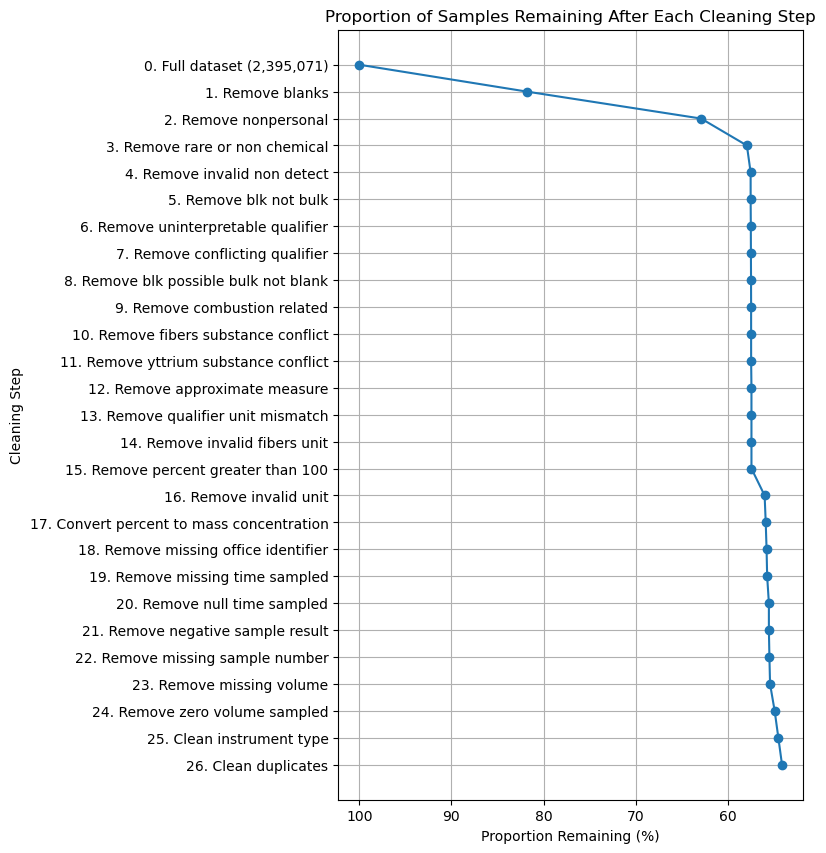

In [5]:
initial_count = len(raw_exposure_data)
_ = cehd.plot_cumulative_changes(path_settings['cehd_log_file'], initial_count)

In [4]:
r_exposure_data = pd.read_parquet('exposure_data.parquet').set_index('V1')

r_exposure_data

,AIR_VOLUME_SAMPLED,BLANK_USED,CITY,DATE_REPORTED,DATE_SAMPLED,EIGHT_HOUR_TWA_CALC,ESTABLISHMENT_NAME,FIELD_NUMBER,IMIS_SUBSTANCE_CODE,INSPECTION_NUMBER,...,ZIP_CODE,CENSORED,SAMPLE_RESULT_2,UNIT_OF_MEASUREMENT_2,QUALIFIER_2,SAMPLE_WEIGHT_2,SAMPLE_RESULT_3,INSTRUMENT_TYPE_2,HASH,CONCAT
V1,,,,,,,,,,,,,,,,,,,,,
4.0,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1591,111252,...,11735,N,0.0640,M,detected,0.0,0.0640,ID121,111252-1591-5245345.0-2LI84-49,N00046-NY-11735-1984-37-0
7.0,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,1840,111252,...,11735,N,0.0000,M,ND,0.0,0.0000,ID121,111252-1840-5245345.0-2LI84-49,N00046-NY-11735-1984-37-0
9.0,74.000,N,East Farmingdale,1984-04-27,1984-04-04,NaN,MID ISLAND NON FERROUS FOUNDRY,2LI84-49,0731,111252,...,11735,N,0.0063,M,detected,0.0,0.0063,ID121,111252-0731-5245345.0-2LI84-49,N00046-NY-11735-1984-37-0
85.0,0.783,N,Passaic,1984-05-18,1984-05-02,NaN,PANTASOTE INC,K167,2580,113951,...,07055,N,1.4000,P,detected,0.0,1.4000,GC-FID,113951-2580-5269568.0-K167,J00522-NJ-07055-1984-15-0
118.0,3.000,N,Clifton,1984-04-27,1984-04-10,NaN,IBG INC BLEACHETTE BLUING DIV,976,2280,114033,...,07015,N,19.0000,P,detected,0.0,19.0000,GC-FID,114033-2280-5269873.0-976,K00477-NJ-07015-1984-15-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None
NaN,NaN,NaN,None,None,None,NaN,None,None,None,None,...,NaN,None,NaN,None,None,NaN,NaN,None,None,None


In [5]:
len(r_database) - len(database) == 2

True

In [6]:
r_exposure_data.shape, exposure_data.shape

((1296123, 35), (1295902, 35))

In [7]:
len(r_exposure_data) - len(exposure_data)

221

In [9]:
len(r_exposure_data) - r_exposure_data.duplicated().sum() - len(exposure_data)

3

In [11]:
exposure_data = pd.read_parquet('exposure_data.parquet')

In [12]:
exposure_data.shape  r_exposure_data.shape

((1320183, 23), (1296123, 35))

In [19]:
len(exposure_data) - len(r_exposure_data)

24060

In [13]:
r_exposure_data.columns.difference(exposure_data.columns)

Index(['AIR_VOLUME_SAMPLED', 'BLANK_USED', 'CENSORED', 'CITY', 'CONCAT',
       'DATE_REPORTED', 'DATE_SAMPLED', 'EIGHT_HOUR_TWA_CALC',
       'ESTABLISHMENT_NAME', 'FIELD_NUMBER', 'HASH', 'IMIS_SUBSTANCE_CODE',
       'INSPECTION_NUMBER', 'INSTRUMENT_TYPE', 'INSTRUMENT_TYPE_2',
       'LAB_NUMBER', 'NAICS_CODE', 'OFFICE_ID', 'QUALIFIER', 'QUALIFIER_2',
       'SAMPLE_RESULT', 'SAMPLE_RESULT_2', 'SAMPLE_RESULT_3', 'SAMPLE_TYPE',
       'SAMPLE_WEIGHT', 'SAMPLE_WEIGHT_2', 'SAMPLING_NUMBER', 'SIC_CODE',
       'STATE', 'SUBSTANCE', 'TIME_SAMPLED', 'UNIT_OF_MEASUREMENT',
       'UNIT_OF_MEASUREMENT_2', 'YEAR', 'ZIP_CODE'],
      dtype='object')

In [18]:
r_exposure_data.columns.difference(exposure_data.columns.str.upper().str.strip('_N'))

Index(['BLANK_USED', 'CENSORED', 'CONCAT', 'EIGHT_HOUR_TWA_CALC',
       'INSTRUMENT_TYPE_2', 'NAICS_CODE', 'QUALIFIER', 'QUALIFIER_2',
       'SAMPLE_RESULT_2', 'SAMPLE_RESULT_3', 'SAMPLE_TYPE', 'SAMPLE_WEIGHT_2',
       'UNIT_OF_MEASUREMENT_2'],
      dtype='object')

In [5]:
rdb = pd.read_parquet('exposure_data.parquet')
rdbf1 = pd.read_parquet('dbf1.parquet')
rdbf2 = pd.read_parquet('dbf2.parquet')

In [11]:
len(rdbf1), len(exposure_data)

(1296123, 1295902)

In [12]:
len(rdbf1) - len(exposure_data)

221

In [14]:
len(rdbf2) == len(rdbf1)

True

In [17]:
original = pd.read_parquet('original.parquet')

len(original)

1320183

In [ ]:
# TODO: Annotate this notebook. 
# Do thorough comparison of the dataframes
# Can show figure comparing sample size reductions for each cleaning step R vs. Python?